## $\color{green}{\text{Ciencia de Datos:}}$ Visualización de la Información
UNAM-IIMAS, Semestre 2023-2
## $\color{blue}{\text{Práctica-04: Rango de valores en una imagen}}$

La imagen "PhantomOriginal" tiene detalles que no se observan fácilmente

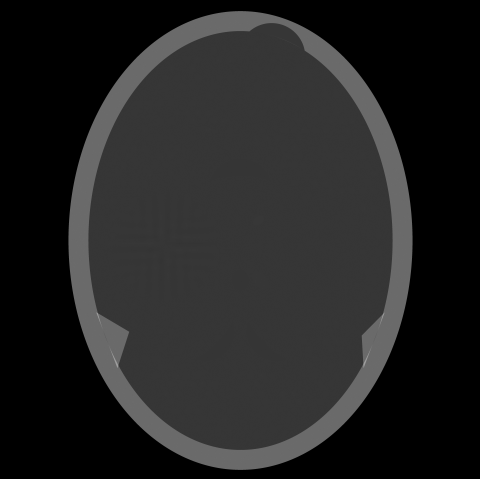

In [1]:
from IPython import display
display.Image('PhantomOriginal.png')

Uno de los métodos que se puede usar para mejorar una imagen es la **ecualización de histograma**, la cuál en particular mejora el $\color{blue}{\text{contraste}}$ de la imagen, es decir, modificación de **intensidades** de pixel. 
* El **histograma** es simplemente un diagrama que representa el número de pixeles en una imagen en cada valor de intensidad encontrado en esa imagen. 

In [2]:
#!pip install opencv-python
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

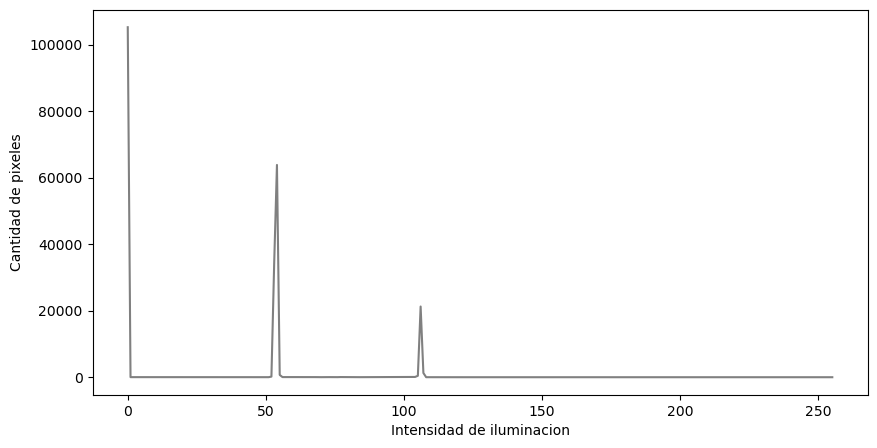

In [3]:
img = cv2.imread('PhantomOriginal.png', cv2.IMREAD_GRAYSCALE)
#cv2.imshow('PhantomOriginal.png', img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')

plt.xlabel('Intensidad de iluminacion')
plt.ylabel('Cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()

El histograma de arriba luce un poco más *concentrado* hacia la *izquierda* de la figura, y lo que hará la **ecualización de histograma** es $\color{red}{\text{distribuir los valores de intensidad de pixel}}$ más allá (en este caso hacía la derecha) para obtener un histograma mas **aplanado**.

In [4]:
import cv2
import numpy

img = cv2.imread('PhantomOriginal.png')
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
cv2.imwrite('PhantomEcualizado.png',hist_equalization_result)

True

Ahora procedemos a analizar el **histograma** de este nuevo "PhantomEcualizado" para verificar que se tiene una *distribución de intensidad de pixel* más uniforme (aplanado).

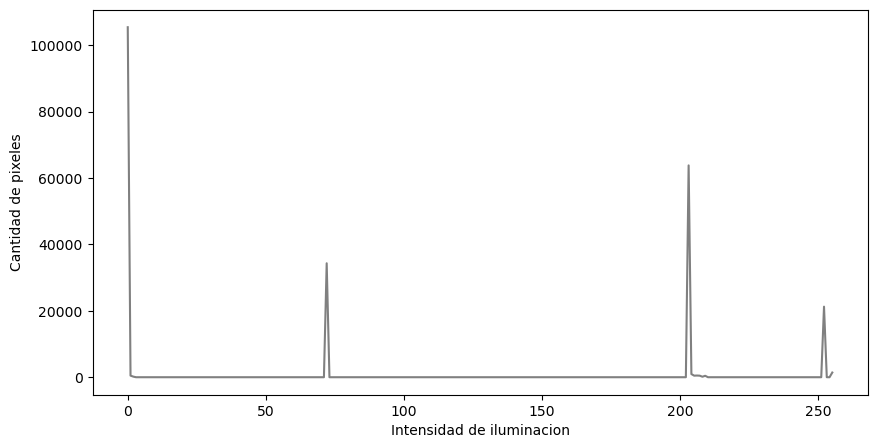

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('PhantomEcualizado.png', cv2.IMREAD_GRAYSCALE)
#cv2.imshow('PhantomEcualizado.png', img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray' )

plt.xlabel('Intensidad de iluminacion')
plt.ylabel('Cantidad de pixeles')
plt.show()

cv2.destroyAllWindows()

## $\color{blue}{\text{Datos Faltantes e Interpolación}}$

Vamos a construir una función que permita "hacer zoom" a una **región** de una imagen (no necesariamente la región de la imagen debe ser elejida de forma interactiva, las coordenadas de la región a la que se quiere hacer zoom, pueden ser parámetros de entrada de la función)

In [6]:
import cv2 as cv                  # open vision library OpenCV
import numpy as np                # Numerical Python 
import matplotlib.pyplot as plt   # Python plotting

In [7]:
a1 = cv.imread('lena.png') # Lectura de la imagen

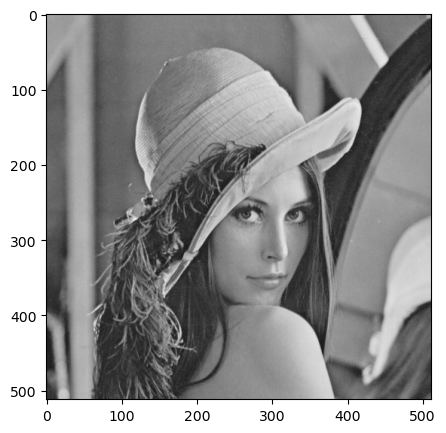

In [8]:
plt.figure()
plt.imshow(a1)
plt.show()

In [9]:
a = np.copy(a1)

# Coordenadas de la región a la que se quiere hacer Zoom
#Lena_zoom=a[200:400,200:350] # 251:283,317:349
Lena_zoom=a[251:283,317:349]

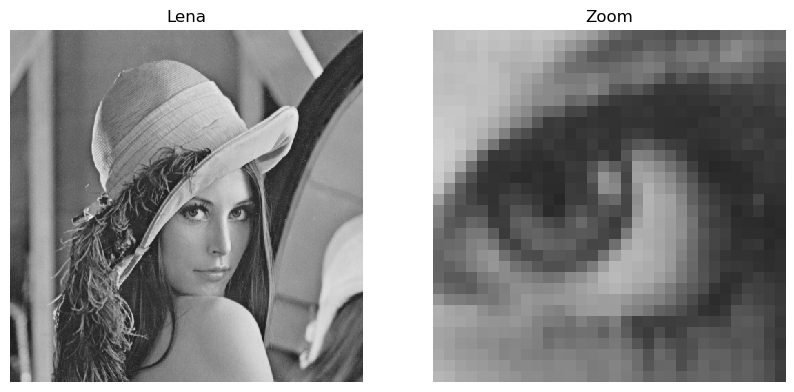

In [10]:
plt.figure()

# INTERPOLACIÓN

# Métodos = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

plt.subplot(121)
plt.imshow(a,cmap='gray',interpolation='None')
plt.title('Lena'),plt.axis('off') 

plt.subplot(122)
plt.imshow(Lena_zoom,cmap='gray',interpolation='none')
plt.title("Zoom"),plt.axis('off') 

plt.show()

### Escalar una imagen: Interpolación

* INTER_NEAREST: una interpolación de vecino más cercano
* INTER_LINEAR: una interpolación bilineal (utilizada de forma predeterminada).
* INTER_AREA: remuestreo utilizando la relación de área de píxeles. 
* INTER_CUBIC: una interpolación bicúbica sobre un vecindario de 4 × 4 píxeles
* INTER_LANCZOS4: una interpolación de Lanczos sobre un vecindario de 8 × 8 píxeles

In [11]:
import cv2

image = cv2.imread('lena.png')

# Escalando una imagen
imageOut = cv2.resize(image,(150,150), interpolation=cv2.INTER_NEAREST)

cv2.imshow('Imagen de entrada',image)
cv2.imshow('Imagen de salida',imageOut)
cv2.waitKey(0) 
cv2.destroyAllWindows()  
cv2.waitKey(1)

-1

## EJERCICIOS
$\color{red}{\text{(1)}}$ Muestre una **ecualización de histograma** de la imagen "lena.png" para mejorar el contraste, es decir, modificar intensidades de pixel. Mencione si hay diferencias.

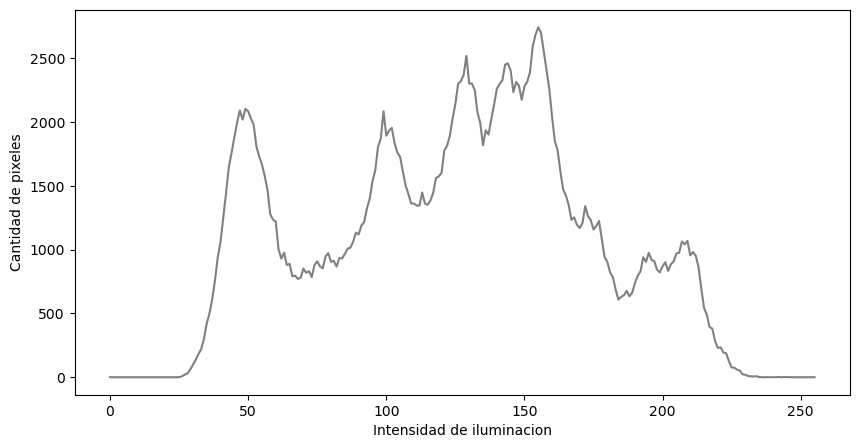

-1

In [12]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('lena original', img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')

plt.xlabel('Intensidad de iluminacion')
plt.ylabel('Cantidad de pixeles')
plt.show()

cv2.waitKey(0) 
cv2.destroyAllWindows()  
cv2.waitKey(1)

In [13]:
img = cv2.imread('lena.png')
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
cv2.imwrite('lenaEqualizada.png',hist_equalization_result)

img_eq = cv2.imread('lenaEqualizada.png')
cv2.imshow('lenaEqualizada.png', img_eq)

cv2.waitKey(0) 
cv2.destroyAllWindows()  
cv2.waitKey(1)

-1

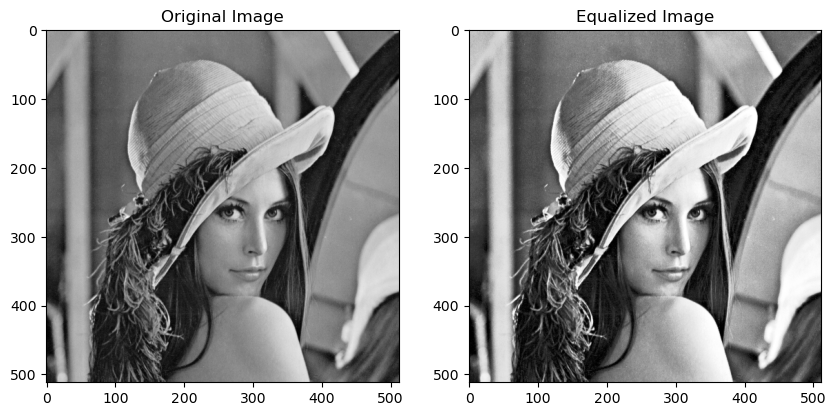

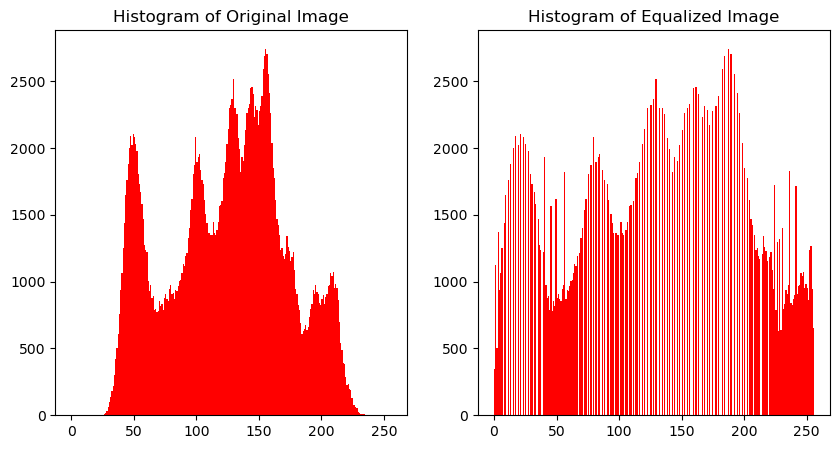

In [14]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
eq_img = cv2.equalizeHist(img)

# Plot the original and equalized images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(eq_img, cmap='gray')
ax2.set_title('Equalized Image')

# Plot the histograms of the original and equalized images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(img.flatten(), 256, [0, 256], color='r')
ax1.set_title('Histogram of Original Image')
ax2.hist(eq_img.flatten(), 256, [0, 256], color='r')
ax2.set_title('Histogram of Equalized Image')
plt.show()


$\color{red}{\text{(2)}}$ Muestre tres regiones ("zoom") de la imagen "lena.png" con tres métodos de interpolación diferentes y explique brevemente sus observaciones. 

Interpolaciones que tenemos: None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

In [15]:
# Cargamos la imagen
a = cv.imread('lena.png')

# Coordenadas de la región a la que se quiere hacer Zoom
#Lena_zoom=a[200:400,200:350] # 251:283,317:349
Lena_zoom=a[251:283,317:349]

plt.figure()

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

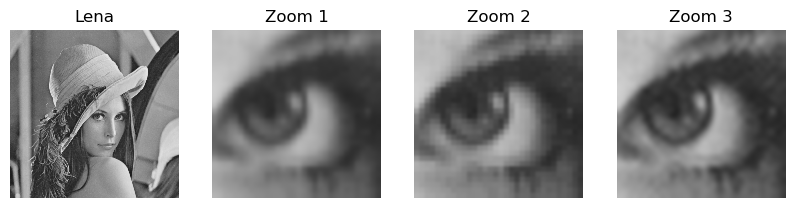

In [16]:
plt.subplot(141)
plt.imshow(a,cmap='gray',interpolation='none')
plt.title('Lena'),plt.axis('off') 

plt.subplot(142)
plt.imshow(Lena_zoom,cmap='gray',interpolation='gaussian')
plt.title("Zoom 1"),plt.axis('off')

plt.subplot(143)
plt.imshow(Lena_zoom,cmap='gray',interpolation='kaiser')
plt.title("Zoom 2"),plt.axis('off')

plt.subplot(144)
plt.imshow(Lena_zoom,cmap='gray',interpolation='lanczos')
plt.title("Zoom 3"),plt.axis('off')

plt.show()

**Explicación**

Notemos que tenemos el mismo zoom del ojo, sin embargo utilizamos diferentes tipos de interpolación.

* Zoom 1: Este tipo de interpolación causa un tipo de borrosidad en la imagen sin embargo el pixelado ya no es notable.
* Zoom 2: Este tipo de interpoalación sigue notando el pixelado, no obstante lo reduce con respecto al original.
* Zoom 3: Este tipo de interpolación causa un efecto de ruido, igualmente el pixelado ya no es notable.